In [685]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pylab as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering 

from scipy.stats import zscore
from scipy import stats
from scipy.spatial.distance import cdist, pdist  #Pairwise distribution between data points
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage, fcluster

#import sklearn.metrics
# from sklearn.model_selection  import train_test_split

In [686]:
df = pd.read_excel("Credit Card Customer Data.xlsx")

In [4]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
df.shape

(660, 7)

In [7]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


#### Checking for nul values. Based on the two statements below no null values.

In [8]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [9]:
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [675]:
df['Total_Credit_Cards'].unique()

array([ 2,  3,  7,  5,  6,  4,  1,  9,  8, 10], dtype=int64)

#### Checking for unique values in the columns.

In [680]:
for c in df.columns[2:7]:
    print(f'Column Name and unique values :  {c, df[c].unique()}')

Column Name and unique values :  ('Avg_Credit_Limit', array([100000,  50000,  30000,  20000,  15000,   5000,   3000,  10000,
        13000,  11000,   9000,   6000,   8000,  19000,  16000,  18000,
        17000,  14000,  12000,   7000,  73000,  49000,  67000,  61000,
        75000,  48000,  56000,  72000,  70000,  51000,  69000,  40000,
        44000,  31000,  37000,  65000,  46000,  74000,  58000,  39000,
        52000,  33000,  47000,  71000,  41000,  59000,  64000,  45000,
        54000,  66000,  27000,  43000,  36000,  25000,  57000,  26000,
        38000,  35000,  34000,  28000,  63000,  29000,  68000,  42000,
        62000,  32000,  60000,  55000, 157000,  94000, 163000, 131000,
        96000, 136000, 121000, 158000, 108000, 166000, 176000, 178000,
        91000, 156000, 146000,  84000, 155000, 200000, 195000, 187000,
       106000, 114000, 126000, 173000, 153000, 184000, 123000, 144000,
        97000,  98000, 127000, 171000, 186000, 183000, 111000, 112000,
       132000,  95000, 

#### Checking for duplicate data (rows). No duplicate data (rows)

In [676]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

#data_df[dups]

# To check for duplicates by column
#pd.concat(g for _, g in data_df.groupby("ID") if len(g) > 1).count()


Number of duplicate rows = 0


In [10]:
df.equals

<bound method NDFrame.equals of      Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0        1         87073            100000                   2   
1        2         38414             50000                   3   
2        3         17341             50000                   7   
3        4         40496             30000                   5   
4        5         47437            100000                   6   
..     ...           ...               ...                 ...   
655    656         51108             99000                  10   
656    657         60732             84000                  10   
657    658         53834            145000                   8   
658    659         80655            172000                  10   
659    660         80150            167000                   9   

     Total_visits_bank  Total_visits_online  Total_calls_made  
0                    1                    1                 0  
1                    0                   10    

In [11]:
df.loc[(df['Customer Key'] == 0)].count()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

#### Checking below to see if there are any quetions marks. No bad data like "?" mark

In [12]:
df.loc[(df['Customer Key'] == '?')].count()

C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

#### Graphical analysis. Using box plots to see if you have any outliers. Two columns have outliers.
#### 1. Avg_Credit_Limit
#### 2. Total_visits_online

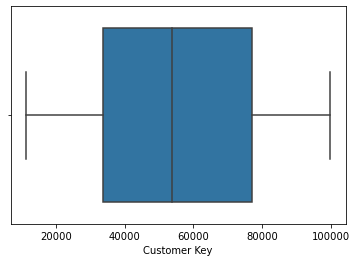

In [13]:
sns.boxplot(x=df['Customer Key'])   # This shows no outliers.

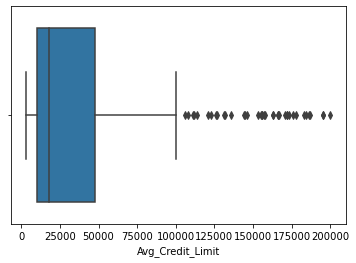

In [14]:
sns.boxplot(x=df['Avg_Credit_Limit'])   # This shows outliers. We see outliers, but in real life it is possible having very
# limited customers with high credit limit. It is possible to have this type of scenario in real life. Let's do Z score and see
# if it can fix thisissue, so that we do't have to worry about it. Tied Z sore and it didn't fix it.

In [15]:
df.loc[(df['Avg_Credit_Limit'] > 100000)].count()  # Lookslike 39 outliers.

Sl_No                  39
Customer Key           39
Avg_Credit_Limit       39
Total_Credit_Cards     39
Total_visits_bank      39
Total_visits_online    39
Total_calls_made       39
dtype: int64

In [16]:
df.loc[df['Avg_Credit_Limit'] > 100000]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
612,613,94391,157000,9,1,14,1
614,615,40019,163000,8,1,7,1
615,616,77910,131000,9,1,10,1
617,618,98216,136000,8,0,13,0
618,619,54495,121000,7,0,13,2
619,620,47650,158000,7,0,13,0
620,621,32107,108000,10,0,15,1
621,622,84192,166000,9,1,12,2
622,623,53916,176000,10,1,15,2
623,624,32584,166000,10,0,7,0


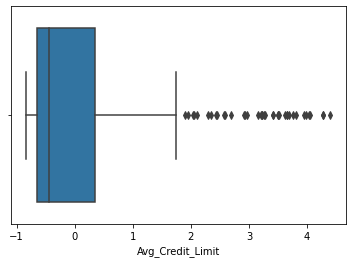

In [28]:
df_z = df.apply(zscore)
sns.boxplot(x=df_z['Avg_Credit_Limit']) 
# We do see outliers with Z score also, so need to see what we can do with outliers.

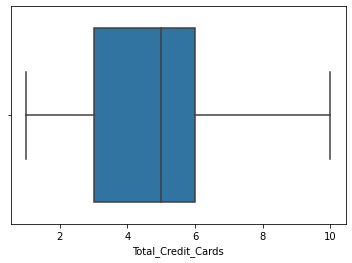

In [18]:
sns.boxplot(x=df['Total_Credit_Cards'])   # This shows no outliers.

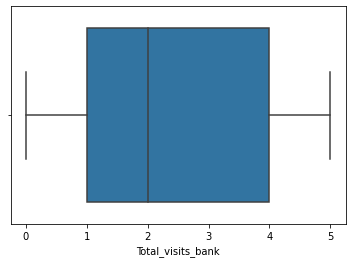

In [19]:
sns.boxplot(x=df['Total_visits_bank'])   # This shows no outliers.

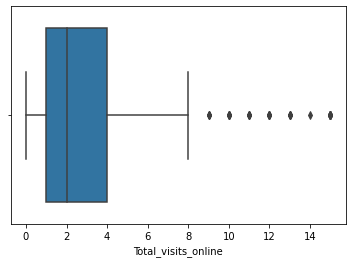

In [20]:
sns.boxplot(x=df['Total_visits_online'])   # This shows outliers.

In [21]:
df.loc[(df['Total_visits_online'] > 8)].count()   # There are 37 outliers.

Sl_No                  37
Customer Key           37
Avg_Credit_Limit       37
Total_Credit_Cards     37
Total_visits_bank      37
Total_visits_online    37
Total_calls_made       37
dtype: int64

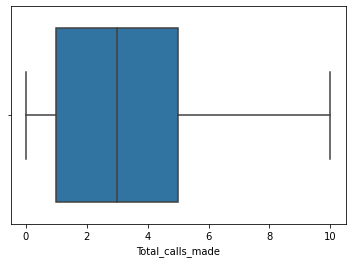

In [22]:
sns.boxplot(x=df['Total_calls_made'])   # This shows no outliers.

#### Trying to see how data is distributed.

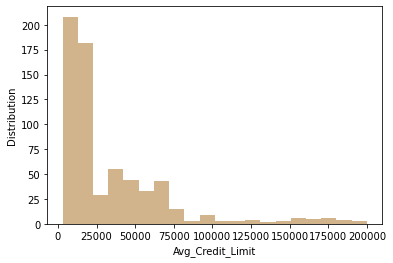

In [23]:
plt.hist(df['Avg_Credit_Limit'], bins= 20, facecolor= 'tan')
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Distribution')
plt.show()

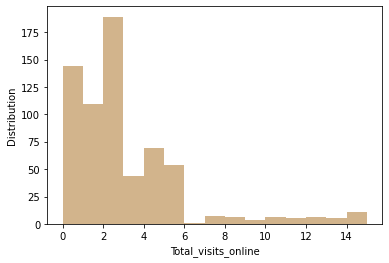

In [24]:
plt.hist(df['Total_visits_online'], bins= 15, facecolor= 'tan')
plt.xlabel('Total_visits_online')
plt.ylabel('Distribution')
plt.show()

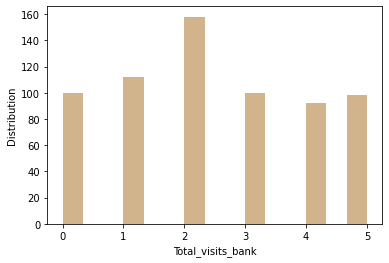

In [30]:
plt.hist(df['Total_visits_bank'], bins= 15, facecolor= 'tan')
plt.xlabel('Total_visits_bank')
plt.ylabel('Distribution')
plt.show()

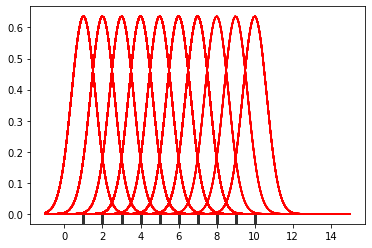

In [25]:
x = df.Total_Credit_Cards 
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-1, 15, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plo

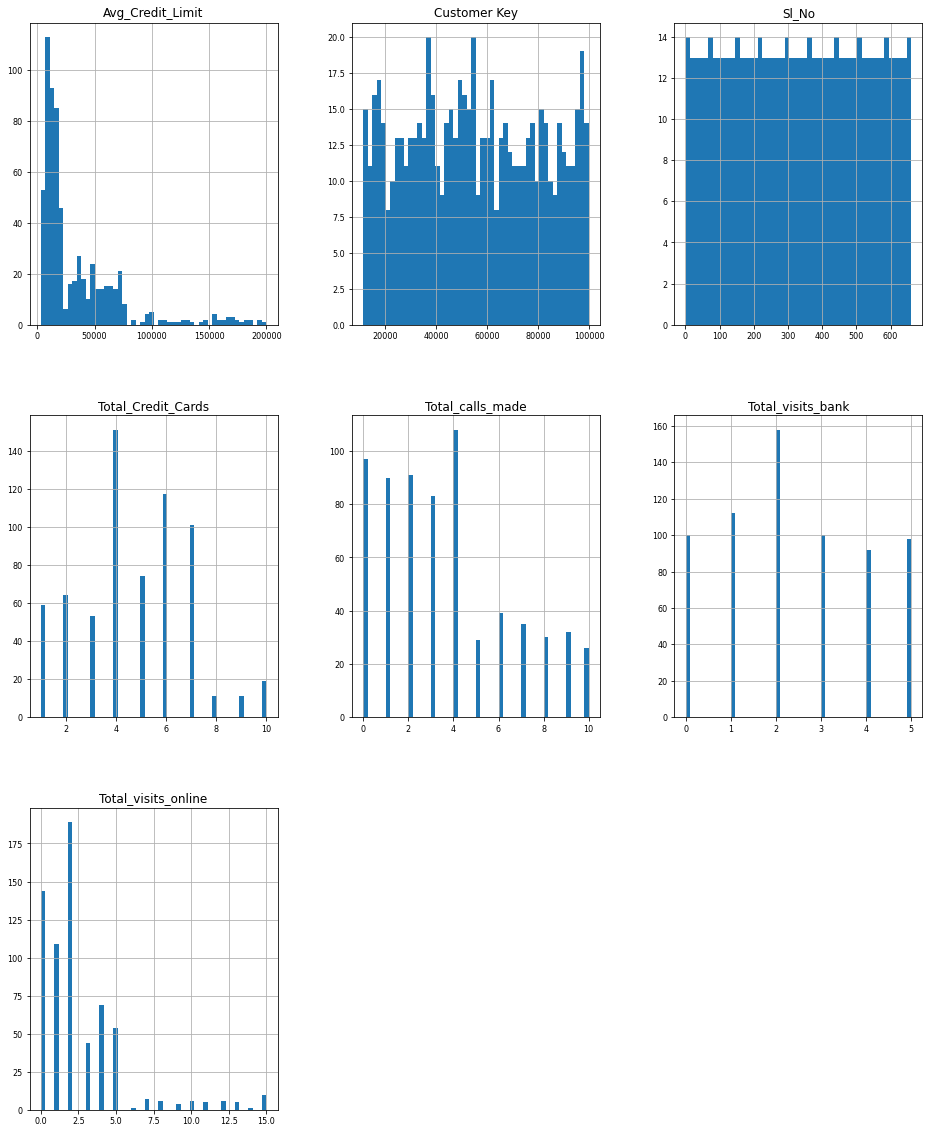

In [29]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

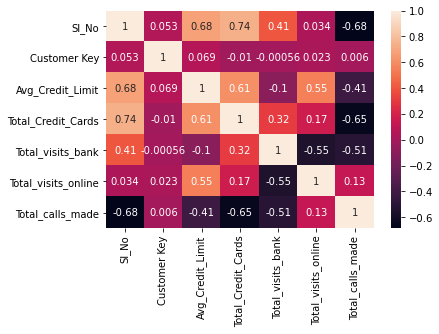

In [102]:
sns.heatmap(df.corr(), annot=True)

## Based on above graphs we can say 
1. Avg_Credit_Limit
2. Total_visits_online both are right skewed. There are outliers in both of them.
3. There are no null values.
4. Rest of the data looks fine.
5. Even after using Z score outliers stayed. So we need to fix the outliers.
6. Avg_Credit_Limit got 39 outliers. Inreal life this is possible as very selected few customers only will have high credi limit.
7. Total_visits_online has 37outliers. 
8. If you lookat my output on cell 16, 24 outliers are matching in both columns.
9. Data also doesn't contain "?" .

## KDE plot for all the features to see how many of it can show separate clusters.

In [ ]:
# Customer key seems to have minimum two clusters.
# Avg_credit_limit seems to have two clusters and data is right skewed because ofoutliers.
# Total_credit_cards and total_visits_to_the banks seems to have 4 clusters.
# Total_visits_online also seems to have 4 clusters with data being right skewed.
# 


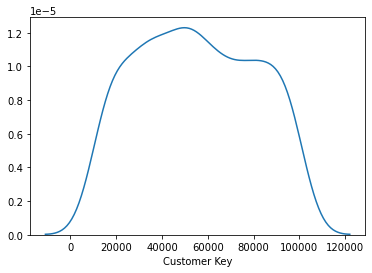

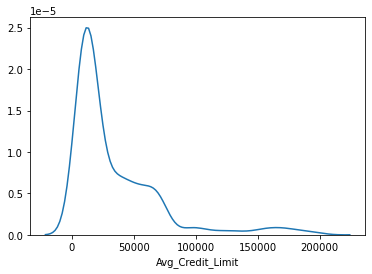

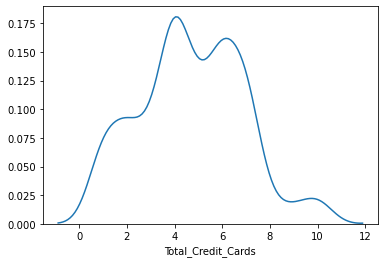

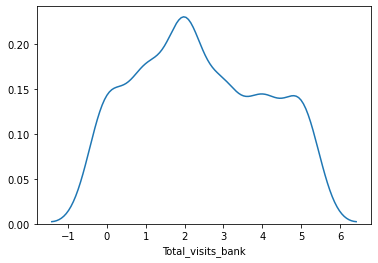

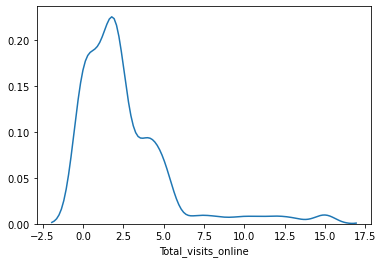

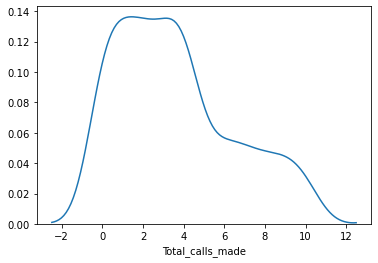

In [25]:
for i in df.columns[df.columns!='Sl_No']:
    sns.distplot(df[i],hist=False,)
    plt.show()

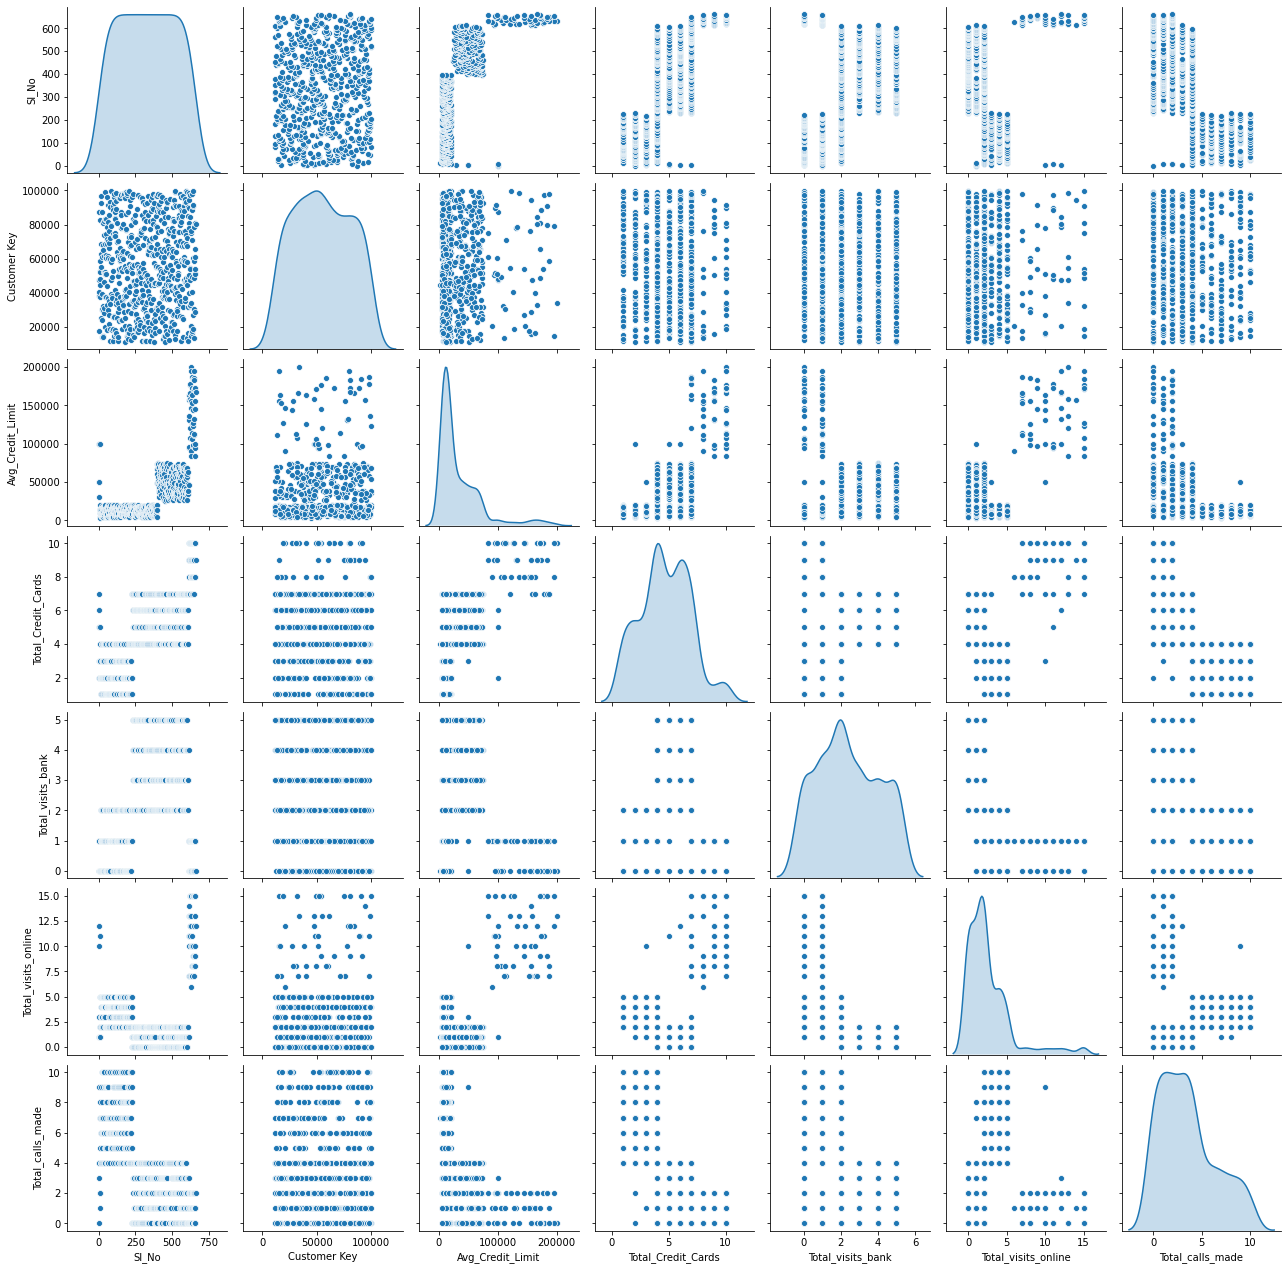

In [54]:
sns.pairplot(df,diag_kind = 'kde') 

In [ ]:
## If you look at these graphs. We are seeing minimum 2 clusters, some are showing 4 clusters.
## I don't see any co-relation betwen columns

## Fixing outliers in Avg_credit_limit and Total_visits_online.

In [31]:
df1 = df.copy()

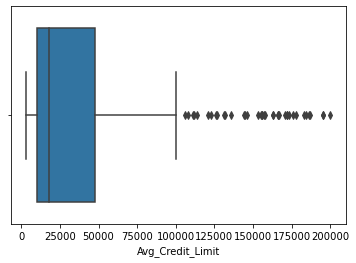

In [33]:
sns.boxplot(x=df1['Avg_Credit_Limit'])  

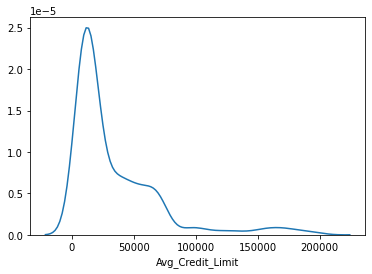

In [35]:
sns.distplot(df1.Avg_Credit_Limit, hist=False)  # To make sure we are not creating gausian distributions while fixing outliers.

In [37]:
df2 = df.copy()
df2 = df2.drop(df2[df2.Avg_Credit_Limit > 100000].index)
df1['Avg_Credit_Limit'].values[df1['Avg_Credit_Limit'] > 100000] = df2.Avg_Credit_Limit.max()
df2.Avg_Credit_Limit.max()

100000

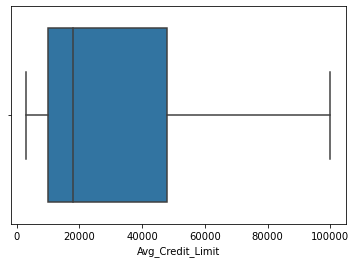

In [38]:
sns.boxplot(x=df1['Avg_Credit_Limit'])  

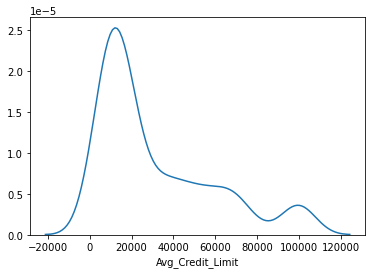

In [39]:
sns.distplot(df1.Avg_Credit_Limit, hist=False)  # We did crete a gausian curve. ALmost got a new cluster.

In [40]:
df1.Avg_Credit_Limit.max()

100000

In [41]:
df1 = df.copy()
df1['Avg_Credit_Limit'].values[df1['Avg_Credit_Limit'] > 100000] = df1.Avg_Credit_Limit.median()
df1.Avg_Credit_Limit.max()  # I think median is not creatinggusian curves or clusters.

100000

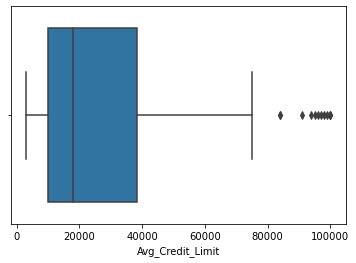

In [44]:
sns.boxplot(x=df1['Avg_Credit_Limit'])  # Median is creating new outliers.

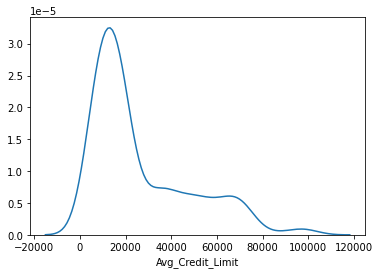

In [42]:
sns.distplot(df1.Avg_Credit_Limit, hist=False) 

In [45]:
df1 = df.copy()
df1['Avg_Credit_Limit'].values[df1['Avg_Credit_Limit'] > 100000] = df1.Avg_Credit_Limit.mode()
df1.Avg_Credit_Limit.max()  # I think median is not creatinggusian curves or clusters.

100000

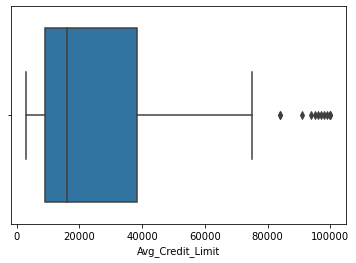

In [46]:
sns.boxplot(x=df1['Avg_Credit_Limit'])  # Median is creating new outliers.

In [75]:
df1 = df.copy()
df1['Avg_Credit_Limit'].values[df1['Avg_Credit_Limit'] > 100000] = 75000
df1.Avg_Credit_Limit.max()  # I think median is not creatinggusian curves or clusters.

100000

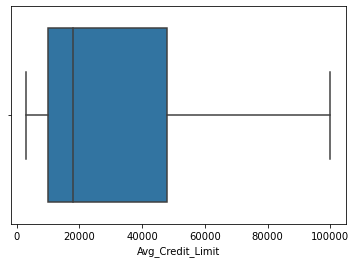

In [76]:
sns.boxplot(x=df1['Avg_Credit_Limit'])  # This fixed the outlier issue.

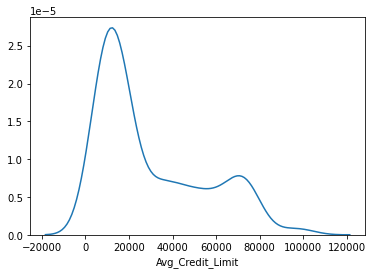

In [77]:
sns.distplot(df1.Avg_Credit_Limit, hist=False)  # Even before wehad a gausian curve at 75000, this just increased the size.
# This should hopefully work fine.

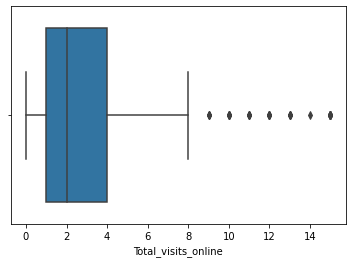

In [78]:
sns.boxplot(x=df1['Total_visits_online'])  

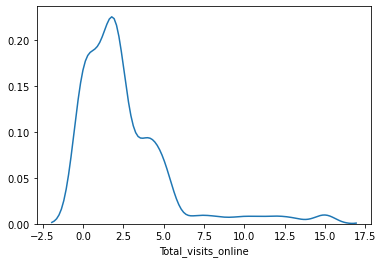

In [79]:
sns.distplot(df1.Total_visits_online, hist=False)

In [80]:
df1['Total_visits_online'].values[df1['Total_visits_online'] > 8] = 8 # df1.Avg_Credit_Limit.median()
df1.Total_visits_online.max()  # I think median is not creating gausian curves or clusters.

8

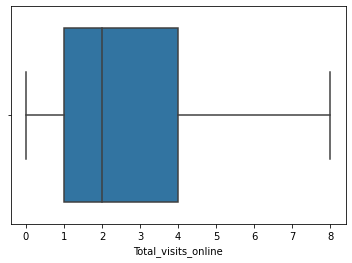

In [81]:
sns.boxplot(x=df1['Total_visits_online'])  

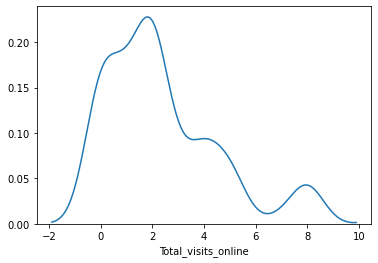

In [82]:
sns.distplot(df1.Total_visits_online, hist=False)  # This created a gausian curve,

In [60]:
# df1['Total_visits_online'].values[df1['Total_visits_online'] > 8] = df1.Total_visits_online.median()
# df1.Total_visits_online.max()  # This created a gusian curves (clusters).

8

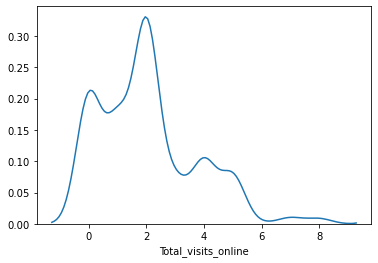

In [61]:
# sns.distplot(df1.Total_visits_online, hist=False)

In [65]:
# df1['Total_visits_online'].values[df1['Total_visits_online'] > 8] = df1.Total_visits_online.mode()
# df1.Total_visits_online.max()  # This created a gusian curve.

8

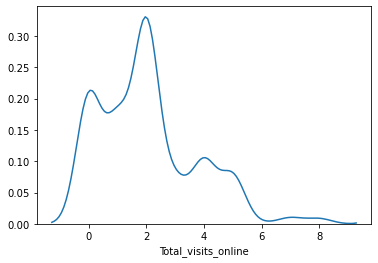

In [66]:
# sns.distplot(df1.Total_visits_online, hist=False)  # Got a gausian curve.

In [73]:
#df1['Total_visits_online'].values[df1['Total_visits_online'] > 8] = df1.Total_visits_online.mean()
#df1.Total_visits_online.max()  # I think median is not creatinggusian curves or clusters.

8

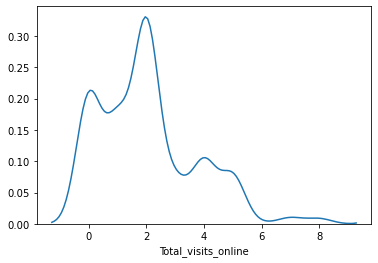

In [74]:
# sns.distplot(df1.Total_visits_online, hist=False) 

In [83]:
# If you look at the original looks like it got 4 clusters ( one at almost 15)
# So let's try to get only four clusters.......
# I feel when you change the outliers to 8, eventhough itcreated a gasian curve, it just moved it from 15 to 8. 
# So that should work.


In [ ]:
# Se we are going ahead with equating the first one with Avg_Credit_Limit> 100000 = 75000
# Total_visits_online > 8 = 8

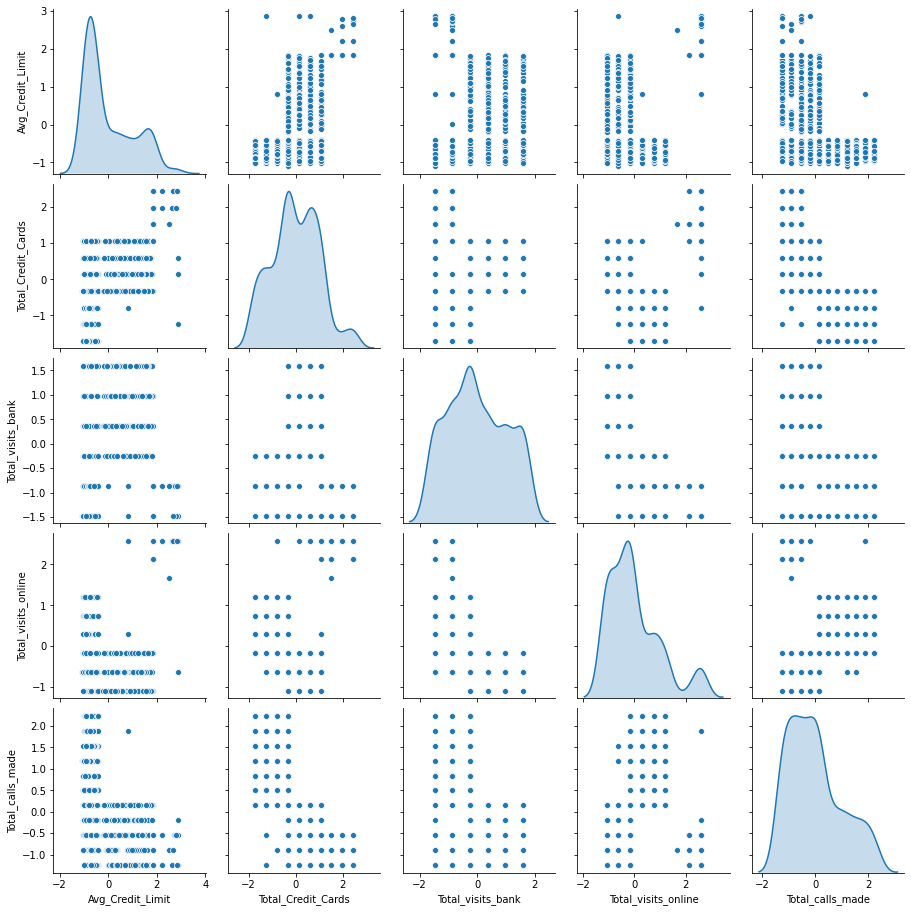

In [223]:
df2=df1.iloc[:,2:]
df3=df2.apply(zscore)
df3_z_gold = df3.copy()
sns.pairplot(df3,diag_kind='kde')

In [216]:
df3.shape[0]

660

In [217]:
df3.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2.858682,-1.249225,-0.860451,-0.627980,-1.251537
1,0.819855,-0.787585,-1.473731,2.581387,1.891859
2,0.819855,1.058973,-0.860451,0.288982,0.145528
3,0.004325,0.135694,-0.860451,-0.627980,0.145528
4,2.858682,0.597334,-1.473731,2.581387,-0.203739


In [224]:
df3_z_gold.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2.858682,-1.249225,-0.860451,-0.627980,-1.251537
1,0.819855,-0.787585,-1.473731,2.581387,1.891859
2,0.819855,1.058973,-0.860451,0.288982,0.145528
3,0.004325,0.135694,-0.860451,-0.627980,0.145528
4,2.858682,0.597334,-1.473731,2.581387,-0.203739


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

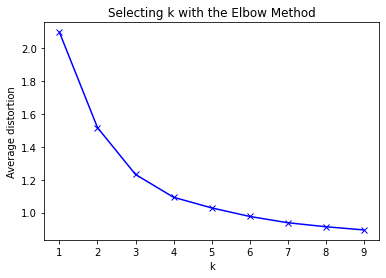

In [225]:
#Finding optimal no. of clusters

clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df3)
    prediction=model.predict(df3)
    meanDistortions.append(sum(np.min(cdist(df3, model.cluster_centers_, 'euclidean'), axis=1)) / df3.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

## KMeans clusteringwith 4 clusters -->

In [226]:
# Let us first start with K = 4
final_model=KMeans(4)
final_model.fit(df3)
prediction=final_model.predict(df3)

#Append the prediction 
df2["GROUP"] = prediction
df3["GROUP"] = prediction
print("Groups Assigned : \n")
df3.head()

Groups Assigned : 



C:\Users\bapatsub\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,2.858682,-1.249225,-0.860451,-0.627980,-1.251537,1
1,0.819855,-0.787585,-1.473731,2.581387,1.891859,0
2,0.819855,1.058973,-0.860451,0.288982,0.145528,1
3,0.004325,0.135694,-0.860451,-0.627980,0.145528,3
4,2.858682,0.597334,-1.473731,2.581387,-0.203739,2


In [227]:
df2Clust = df2.groupby(['GROUP'])
df2Clust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,12197.309417,2.403587,0.928251,3.551570,6.883408
1,56911.392405,5.531646,3.221519,0.917722,2.063291
2,79260.000000,8.740000,0.600000,7.820000,1.080000
3,17707.423581,5.497817,3.668122,1.030568,1.965066


In [228]:
df3Clust = df3.groupby(['GROUP'])
df3Clust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,-0.721607,-1.062913,-0.904453,0.541866,1.152605
1,1.101678,0.381123,0.501963,-0.665703,-0.530899
2,2.012977,1.862226,-1.105763,2.498861,-0.874330
3,-0.496924,0.365506,0.775856,-0.613965,-0.565206


C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E819567D88>,
      dtype=object)

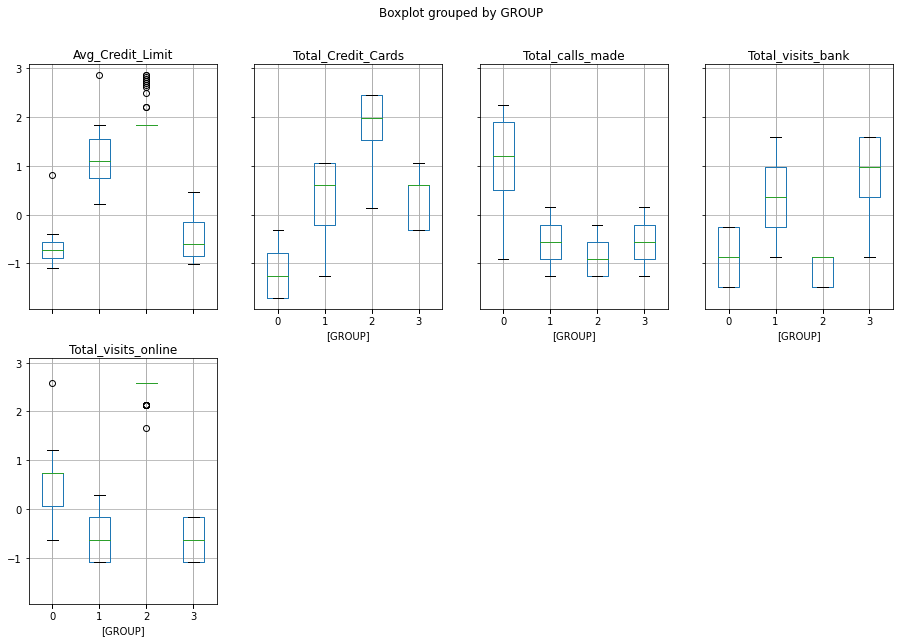

In [229]:
df3.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [235]:
centroids = final_model.cluster_centers_

In [236]:
centroids

array([[-0.72160724, -1.06291281, -0.90445279,  0.54186617,  1.1526047 ],
       [ 1.10710928,  0.37974558,  0.50282817, -0.66302325, -0.53298325],
       [ 2.01297688,  1.86222621, -1.10576269,  2.49886068, -0.87432983],
       [-0.49368081,  0.36651387,  0.77407428, -0.61601974, -0.56363473]])

In [237]:
centroid_df = pd.DataFrame(centroids, columns=list(df3_z_gold))

In [238]:
centroid_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-0.721607,-1.062913,-0.904453,0.541866,1.152605
1,1.107109,0.379746,0.502828,-0.663023,-0.532983
2,2.012977,1.862226,-1.105763,2.498861,-0.874330
3,-0.493681,0.366514,0.774074,-0.616020,-0.563635


In [239]:
final_model.labels_

array([1, 0, 1, 3, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [189]:
# When we choose clusters = 4, which the elbow plot points out. It seems we got the rightclusters.
# If we look at the labels, even though 0, 1, in the end 3s came together. The clustering seems to be mixed and across the whole
# data set.

C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E81ADCC088>,
      dtype=object)

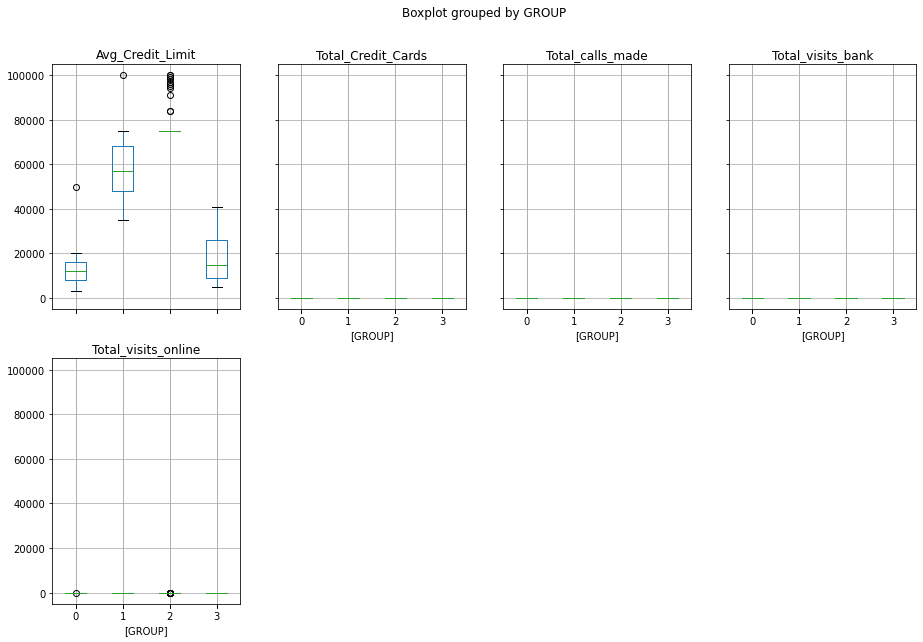

In [240]:
df2.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [241]:
df_labels = pd.DataFrame(final_model.labels_, columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')
df_labeled = df_labels.join(df3.iloc[:,0:5])
df_labeled

,labels,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,2.858682,-1.249225,-0.860451,-0.627980,-1.251537
1,0,0.819855,-0.787585,-1.473731,2.581387,1.891859
2,1,0.819855,1.058973,-0.860451,0.288982,0.145528
3,3,0.004325,0.135694,-0.860451,-0.627980,0.145528
4,2,2.858682,0.597334,-1.473731,2.581387,-0.203739
...,...,...,...,...,...,...
655,2,2.817906,2.443892,-0.860451,2.581387,-1.251537
656,2,2.206258,2.443892,-0.860451,2.581387,-0.553005
657,2,1.839269,1.520613,-0.860451,2.581387,-0.902271
658,2,1.839269,2.443892,-0.860451,2.581387,-1.251537


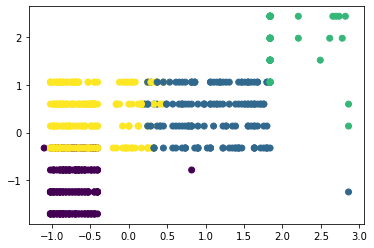

In [242]:
plt.scatter(df_labeled['Avg_Credit_Limit'],df_labeled['Total_Credit_Cards'], c=final_model.labels_ )
plt.show()

In [243]:
silhouette_score(df_labeled.drop('labels',axis=1),df_labeled['labels'] )   # We gor score of 39 with four clusters.

0.3994649542332703

## KMeans clusteringwith 3 clusters -->

In [244]:
# Let us try with K = 3
df3 = df3_z_gold.copy()
final_model=KMeans(3)
final_model.fit(df3)
prediction=final_model.predict(df3)

#Append the prediction 
df2["GROUP"] = prediction
df3["GROUP"] = prediction
print("Groups Assigned : \n")
df3.head()

Groups Assigned : 



C:\Users\bapatsub\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,2.858682,-1.249225,-0.860451,-0.627980,-1.251537,2
1,0.819855,-0.787585,-1.473731,2.581387,1.891859,0
2,0.819855,1.058973,-0.860451,0.288982,0.145528,2
3,0.004325,0.135694,-0.860451,-0.627980,0.145528,2
4,2.858682,0.597334,-1.473731,2.581387,-0.203739,1


C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E81B5A72C8>,
      dtype=object)

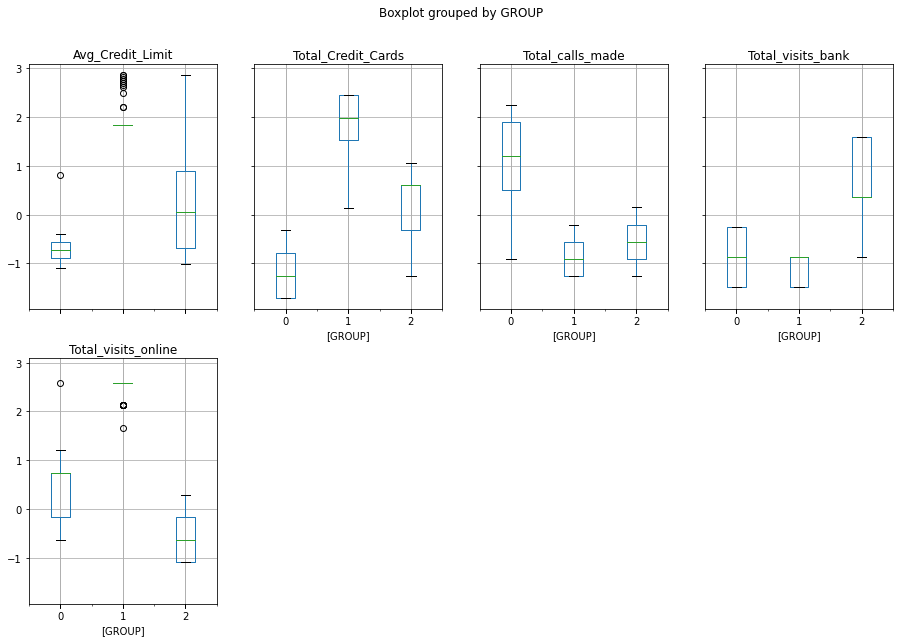

In [245]:
df3.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [246]:
centroids = final_model.cluster_centers_

In [247]:
centroids

array([[-0.72255335, -1.05962278, -0.9015185 ,  0.53869043,  1.14810882],
       [ 2.01297688,  1.86222621, -1.10576269,  2.49886068, -0.87432983],
       [ 0.15855727,  0.37368962,  0.6663945 , -0.63629453, -0.55300488]])

In [248]:
centroid_df = pd.DataFrame(centroids, columns=list(df3_z_gold))

In [249]:
centroid_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-0.722553,-1.059623,-0.901518,0.538690,1.148109
1,2.012977,1.862226,-1.105763,2.498861,-0.874330
2,0.158557,0.373690,0.666395,-0.636295,-0.553005


In [250]:
final_model.labels_

array([2, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [251]:
final_model.labels_.shape

(660,)

In [252]:
pd.DataFrame(final_model.labels_, columns = list(['labels']))

,labels
0,2
1,0
2,2
3,2
4,1
...,...
655,1
656,1
657,1
658,1


Text(0.5, 0.92, 'Total_visits_online')

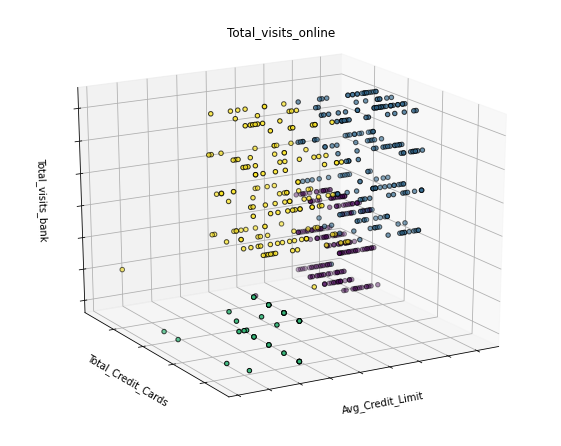

In [253]:
## 3D plots of clusters

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
k3_model=KMeans(4)
k3_model.fit(df3)
labels = k3_model.labels_
ax.scatter(df3.iloc[:, 0], df3.iloc[:, 1], df3.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Avg_Credit_Limit')
ax.set_ylabel('Total_Credit_Cards')
ax.set_zlabel('Total_visits_bank')
ax.set_title('Total_visits_online')

In [254]:
df4=df3.iloc[:,0:5]
df4.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2.858682,-1.249225,-0.860451,-0.627980,-1.251537
1,0.819855,-0.787585,-1.473731,2.581387,1.891859
2,0.819855,1.058973,-0.860451,0.288982,0.145528
3,0.004325,0.135694,-0.860451,-0.627980,0.145528
4,2.858682,0.597334,-1.473731,2.581387,-0.203739


In [255]:
df_labels = pd.DataFrame(final_model.labels_, columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')
df_labeled = df_labels.join(df3.iloc[:,0:5])
df_labeled

,labels,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2,2.858682,-1.249225,-0.860451,-0.627980,-1.251537
1,0,0.819855,-0.787585,-1.473731,2.581387,1.891859
2,2,0.819855,1.058973,-0.860451,0.288982,0.145528
3,2,0.004325,0.135694,-0.860451,-0.627980,0.145528
4,1,2.858682,0.597334,-1.473731,2.581387,-0.203739
...,...,...,...,...,...,...
655,1,2.817906,2.443892,-0.860451,2.581387,-1.251537
656,1,2.206258,2.443892,-0.860451,2.581387,-0.553005
657,1,1.839269,1.520613,-0.860451,2.581387,-0.902271
658,1,1.839269,2.443892,-0.860451,2.581387,-1.251537


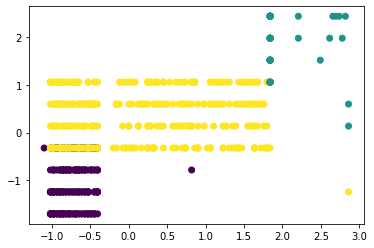

In [256]:
plt.scatter(df_labeled['Avg_Credit_Limit'],df_labeled['Total_Credit_Cards'], c=final_model.labels_ )
plt.show()

In [257]:

silhouette_score(df_labeled.drop('labels',axis=1),df_labeled['labels'] )   # We got a score of 50 with three clusters which is
# better than the previous 39.

0.5047881723333618

In [210]:
# As per the elbow curve, 4 seems to be the resonable clusters.
# When you look at box plot with clusters = 4. We do see little ovelap of Total_Credit_Cards, Total_Calls_made.
# If we look at clusters = 3 , not that much overlap.
# But the elbo plot, labels and box plots put together 4 seems to be reasonable.
# But if we lookat the silhoutte score 3 clusters got a better value.
# So finally 3 clusters seems to be GOOD.

## Hierachical clustering -->

In [709]:
df3 = df3_z_gold.copy()
df3.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2.858682,-1.249225,-0.860451,-0.627980,-1.251537
1,0.819855,-0.787585,-1.473731,2.581387,1.891859
2,0.819855,1.058973,-0.860451,0.288982,0.145528
3,0.004325,0.135694,-0.860451,-0.627980,0.145528
4,2.858682,0.597334,-1.473731,2.581387,-0.203739


#### Use ward as linkage metric and distance as Eucledian

In [710]:
Z = linkage(df3, 'ward', metric='euclidean')
Z.shape

(659, 4)

In [711]:
Z[:]

array([[ 464.        ,  497.        ,    0.        ,    2.        ],
       [ 425.        ,  455.        ,    0.        ,    2.        ],
       [ 334.        ,  385.        ,    0.        ,    2.        ],
       ...,
       [1313.        , 1315.        ,   21.06722213,  387.        ],
       [1300.        , 1316.        ,   40.72570431,  437.        ],
       [1314.        , 1317.        ,   52.49222104,  660.        ]])

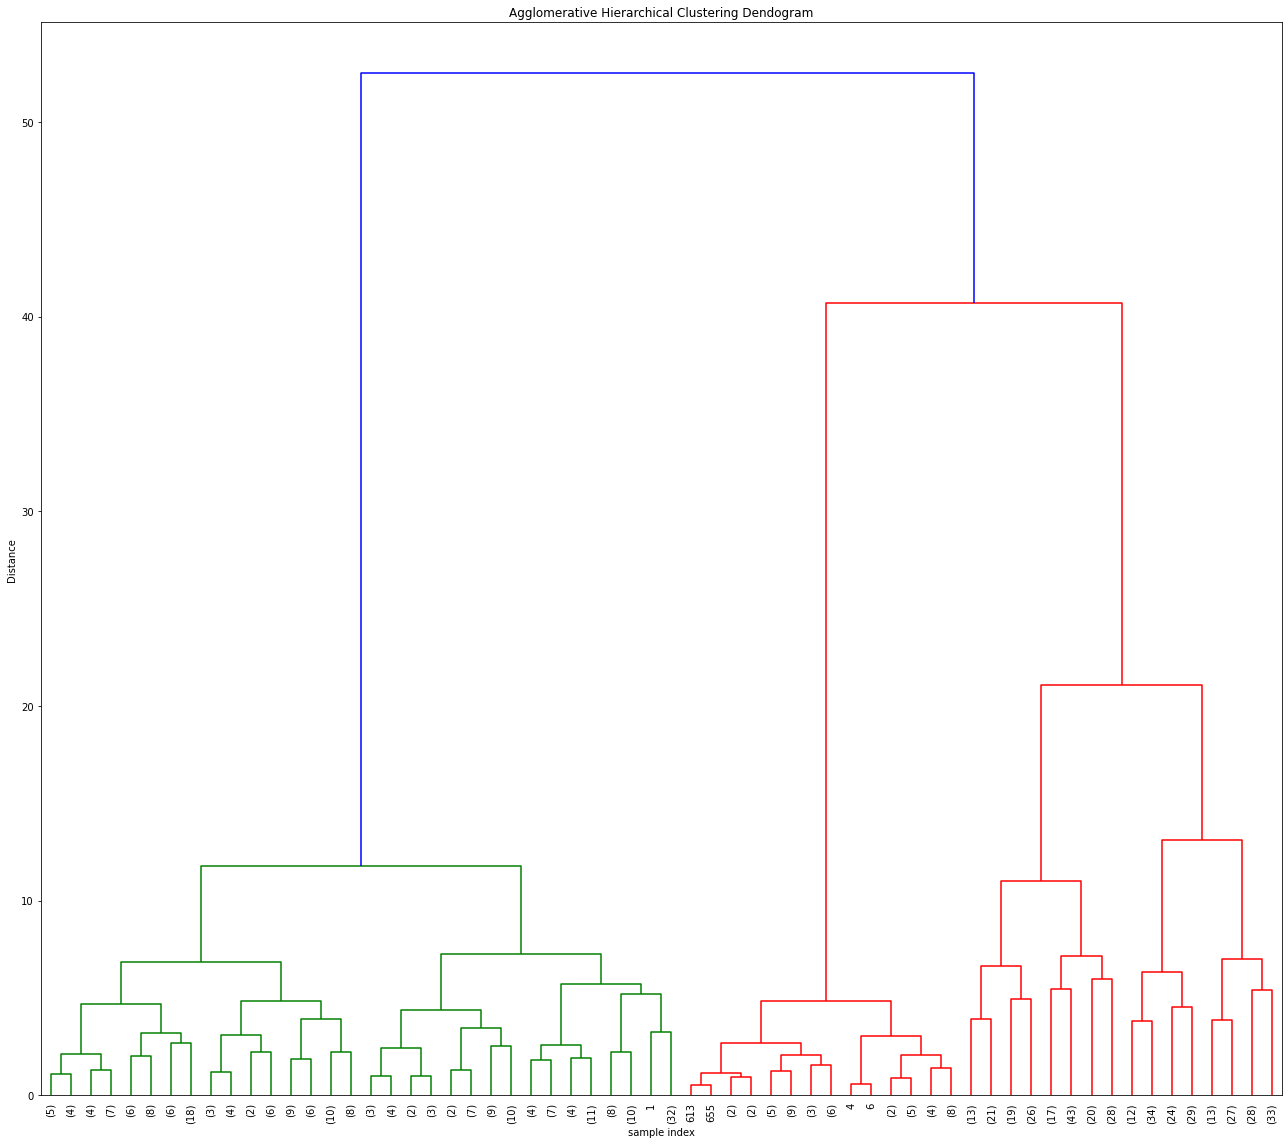

In [712]:
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df3, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

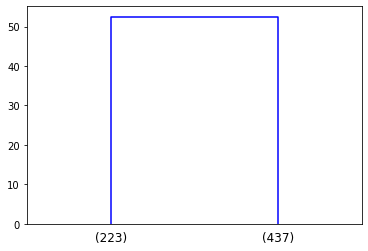

In [715]:
# Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=2,  # show only the last p merged clusters
)
plt.show()

In [717]:
max_d = 52
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [718]:
# Calculate Silhoutte Score for Ward linkage
silhouette_score(df3,clusters)

0.4176330137256762

In [719]:
df_clusters = pd.DataFrame(data = clusters, columns= ['GROUP'])
df_clusters 
# df_labels.join(df3.iloc[:,0:5])
df4 = df3.join(df_clusters)

C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E827E53208>,
      dtype=object)

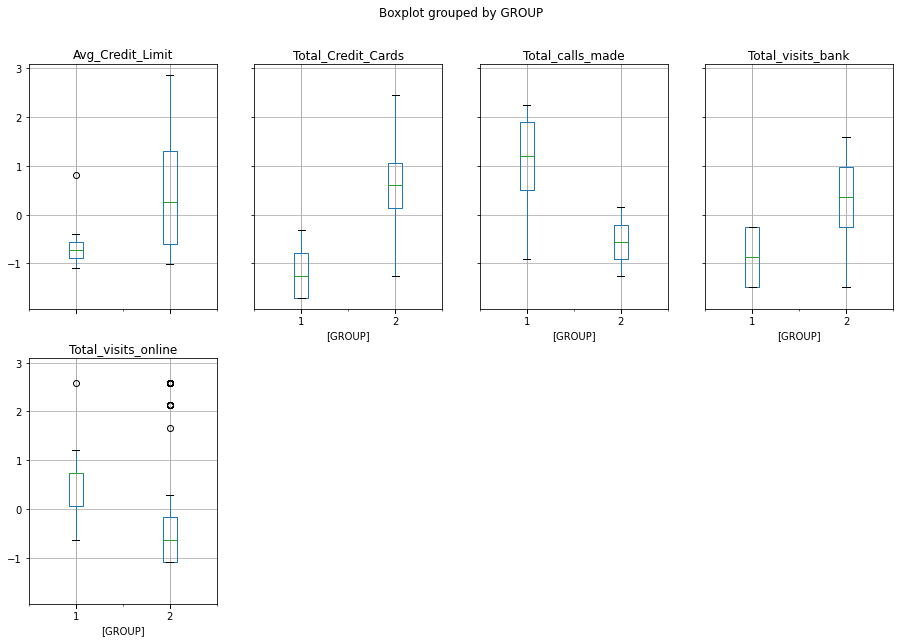

In [720]:
df4.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [721]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df3, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(df3))

c

0.7668112424099262

#### Use average as linkage metric and distance as Eucledian

In [ ]:
## Did with three clusters. Got score 36 and one cluster zero rows. So changed to 2.

In [526]:
df3 = df3_z_gold.copy()

In [527]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')

In [528]:
model.fit(df3)

AgglomerativeClustering(linkage='average')

In [529]:
L=model.labels_
L

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [530]:
# Calculate Avg Silhoutte Score
silhouette_score(df3,L)

0.47280579123109273

In [531]:
Z = linkage(df3, 'average', metric='euclidean')

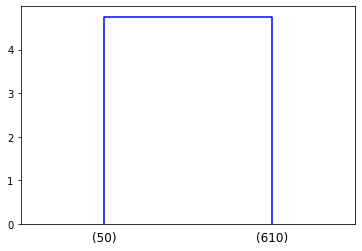

In [534]:
# Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=2,  # show only the last p merged clusters
)
plt.show()

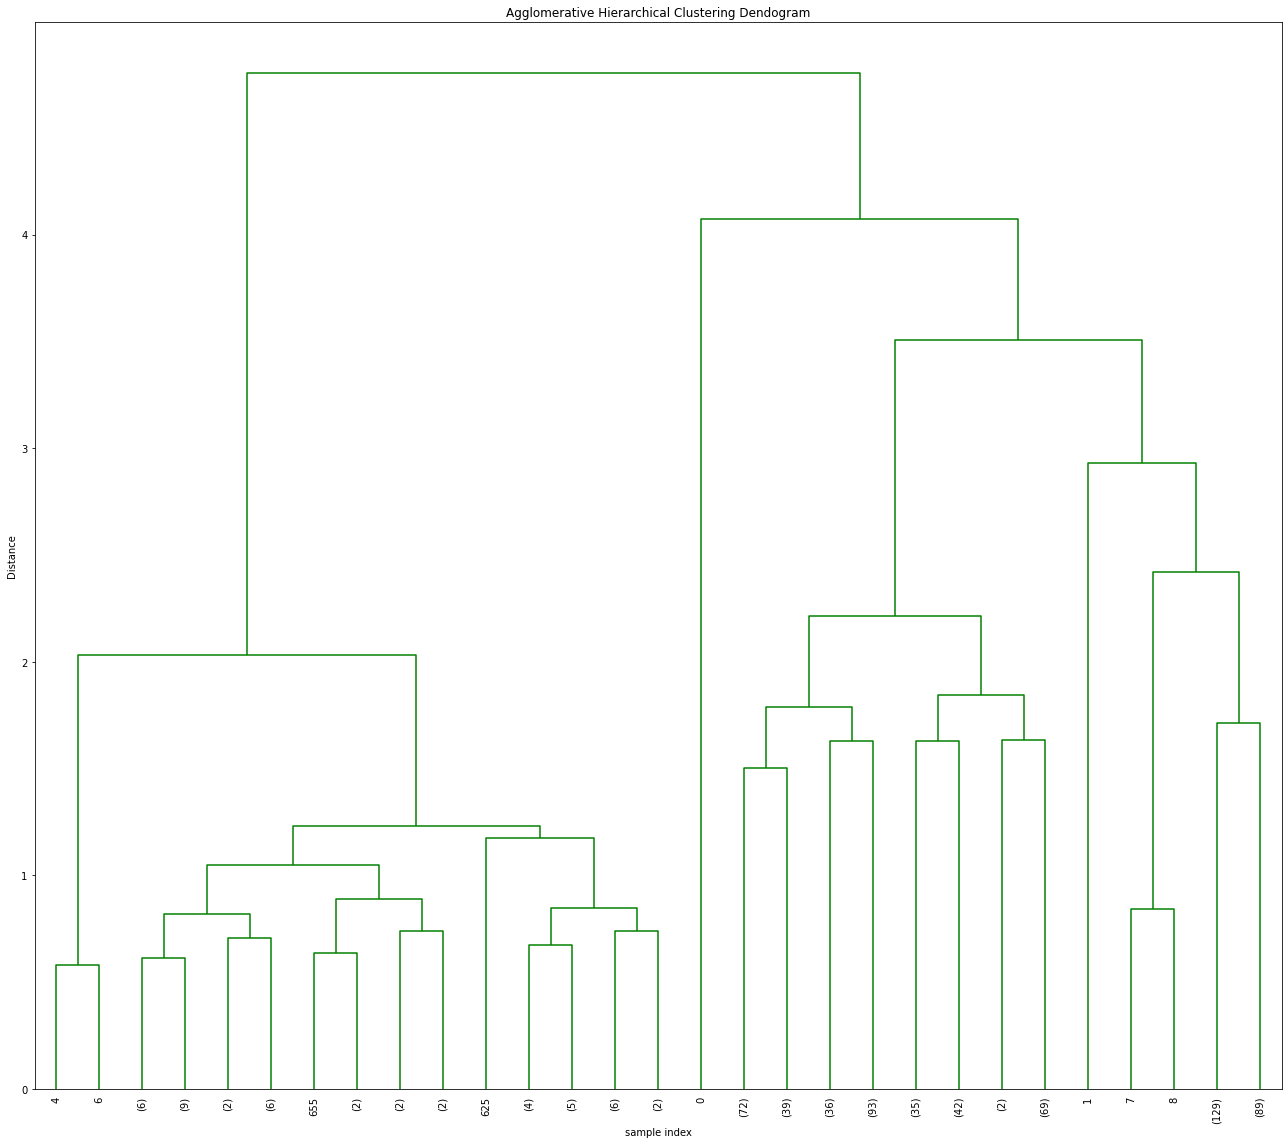

In [535]:
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df3, 'average')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [536]:
df_clusters = pd.DataFrame(data = L , columns= ['GROUP'])
df_clusters 
df4 = df3.join(df_clusters)

C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E82585D9C8>,
      dtype=object)

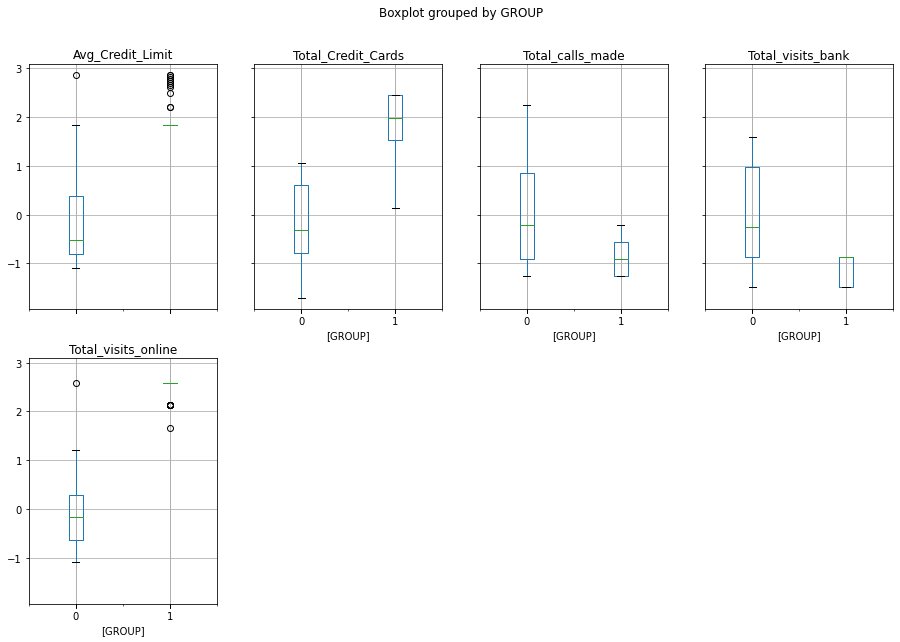

In [537]:
df4.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [538]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df3, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df3))

c

0.8738818374092228

In [ ]:
# This is the highest we got in the entire analysis close to 1.

#### Use complete as linkage metric and distance as Eucledian

In [656]:
df3 = df3_z_gold.copy()

In [657]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='complete')

model.fit(df3)

L=model.labels_
L

array([0, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [658]:
# Calculate Avg Silhoutte Score
silhouette_score(df3,L)

0.5036210021628501

In [659]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df3, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(df3))

c

0.8482180751274768

In [660]:
# Z = linkage(df3, 'complete', metric='euclidean')

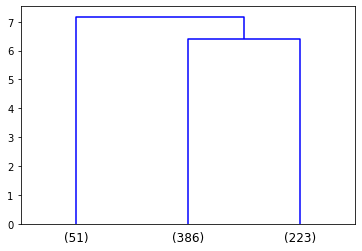

In [661]:
# Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

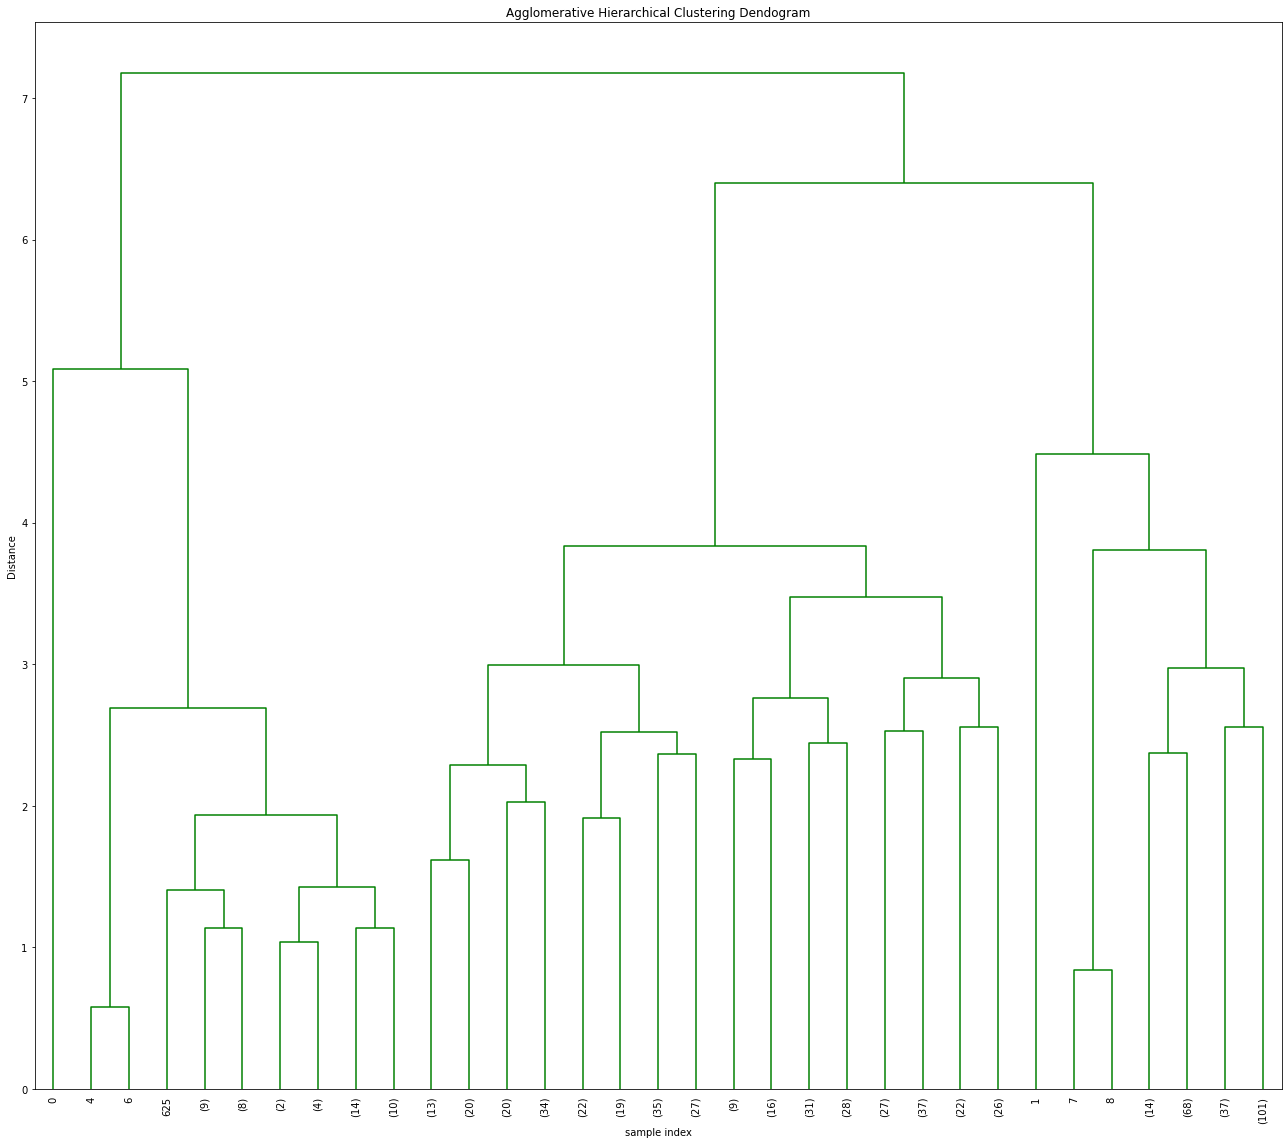

In [662]:
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df3, 'complete')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [663]:
df_clusters = pd.DataFrame(data = L , columns= ['GROUP'])
df_clusters 
df4 = df3.join(df_clusters)

C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E82A35A048>,
      dtype=object)

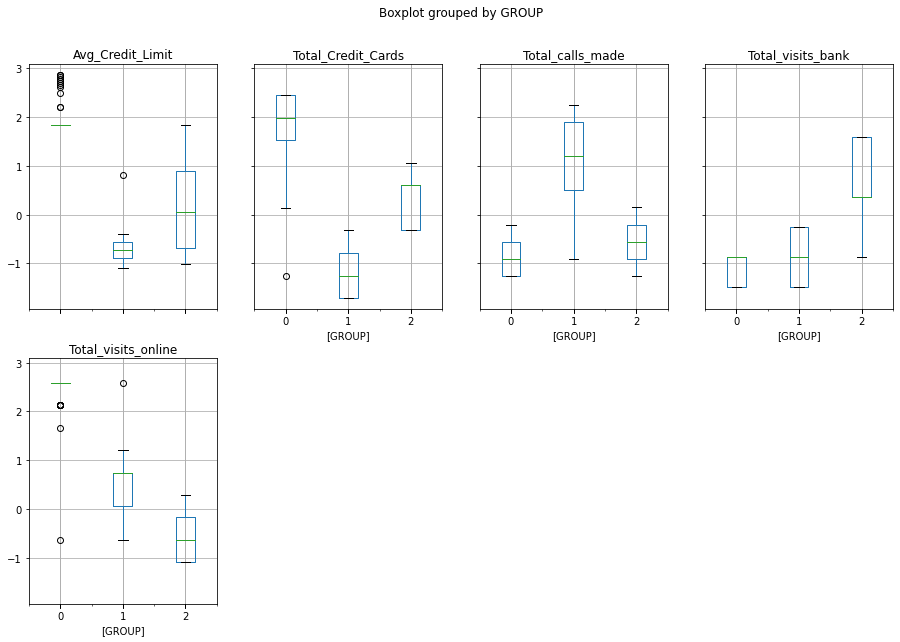

In [664]:
df4.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

#### Use shortest as linkage metric and distance as Eucledian

In [ ]:
## Tried 3 clusters. it gave me one row in a cluster. the silhotte came aroung 31. Changed to two clusters 
## then the score went to 47.

In [665]:
df3 = df3_z_gold.copy()

model = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='single')

model.fit(df3)

AgglomerativeClustering(linkage='single')

In [666]:
L=model.labels_
L

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [667]:
# Calculate Avg Silhoutte Score
silhouette_score(df3,L)

0.47280579123109273

In [668]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(df3, metric='euclidean', method='single')
c, coph_dists = cophenet(Z , pdist(df3))

c

0.6042365834224761

In [669]:
#Z = linkage(df3, 'single', metric='euclidean')

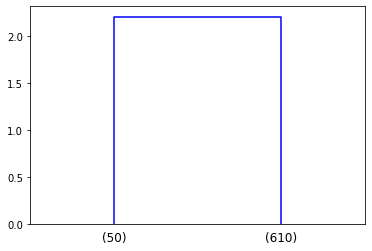

In [670]:
# Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=2,  # show only the last p merged clusters
)
plt.show()

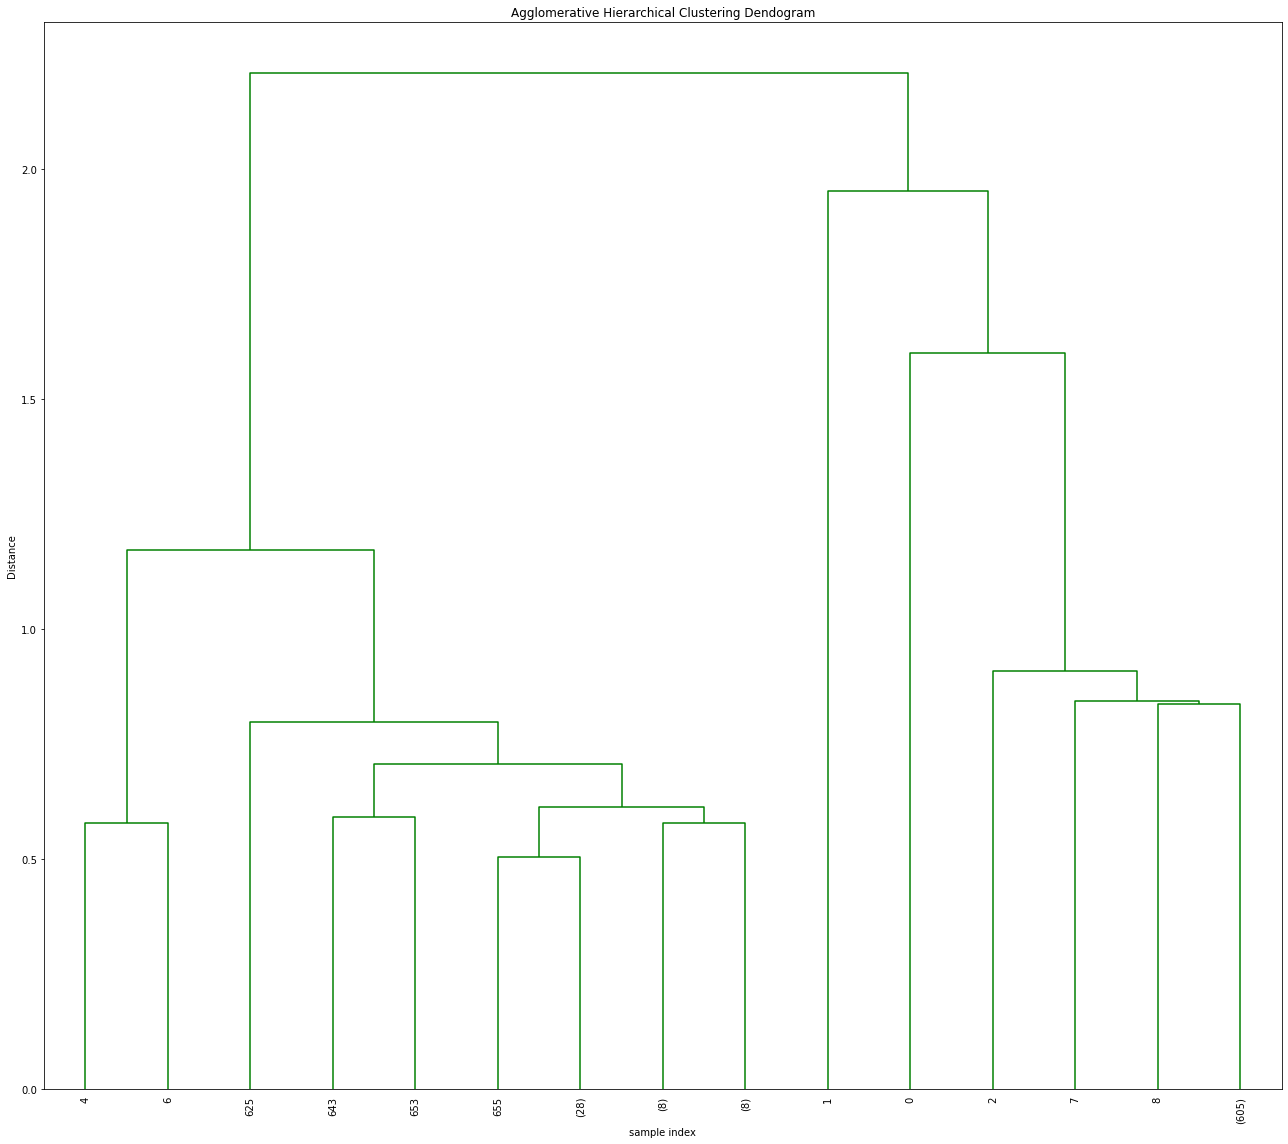

In [671]:
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df3, 'single')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [672]:
df_clusters = pd.DataFrame(data = L , columns= ['GROUP'])
df_clusters 
df4 = df3.join(df_clusters)

C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E82F47DAC8>,
      dtype=object)

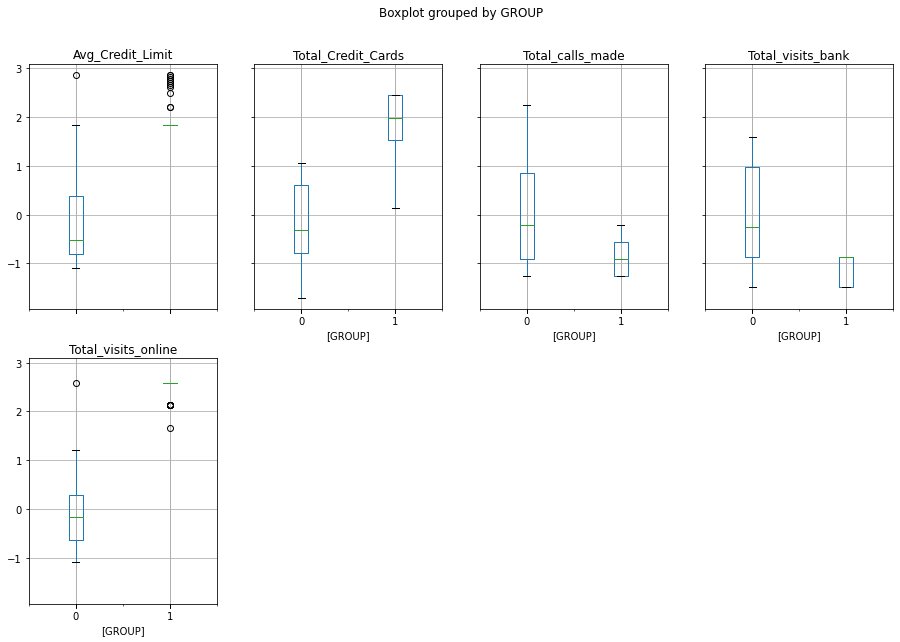

In [673]:
df4.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [548]:
df1

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,8,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,8,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,8,0
656,657,60732,84000,10,1,8,2
657,658,53834,75000,8,1,8,1
658,659,80655,75000,10,1,8,0


### So far we did analysis after fixing outliers, results were not that great. So started afresh and did analysis without 
### fixing outliers and got better results. So this is what is used as final analysis.
### This is what is used in comparison of clusters between KMean and Hiearchical.
### Also this is what is used for comparing clusters among themselves.
### This is what is used creating recommendations for the bank.
### Please note I provided comments here. Did analysis here and also created a separate word document for analysis.
### I didn't add 25%, 50% etc., results from here in the analysis as they are self-explanatory.
### So this one, with the document together work as a complete solution.

# Trying Hierarchical clustering with Complete Linkage without modifying outliers.

In [832]:
## Let's try not modifying the outliers and see if we can get better results.
## Deleting is not good as the best customers(avg_vredit_limit pretty high will go away)
## Also we have only 660 records.
## Tried fixing outliers and didn't get any good results.
## So trying without fixing outliers......

# df_del.drop(df_del[df_del['Avg_Credit_Limit'] > 100000].index, inplace = True)
# df_del[df_del['Avg_Credit_Limit'] > 100000].count()

In [587]:
df1.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,8,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,8,3


In [588]:
df_del = df.iloc[:,2:7]
df_del

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [589]:
df_z = df_del.apply(zscore)

In [590]:
df_z.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [733]:
df_z_cp = df_z.copy()

In [734]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='complete') # With three got scrore of 50. 
#  so going with 2 clusters,

In [735]:
model.fit(df_z_cp)

AgglomerativeClustering(linkage='complete')

In [736]:
L=model.labels_
L

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [737]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
Z = linkage(df3, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(df_z_cp))

c

0.8061661359199105

In [738]:
# Calculate Avg Silhoutte Score
silhouette_score(df_z_cp,L)

0.5703183487340514

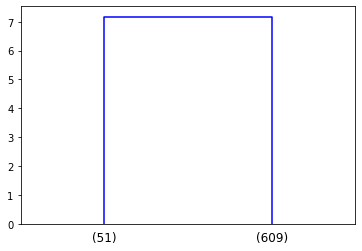

In [739]:
# Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=2,  # show only the last p merged clusters
)
plt.show()

In [740]:
df_clusters = pd.DataFrame(data = L , columns= ['GROUP'])
df_clusters 
df4 = df_z_cp.join(df_clusters)

C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E82C06CC08>,
      dtype=object)

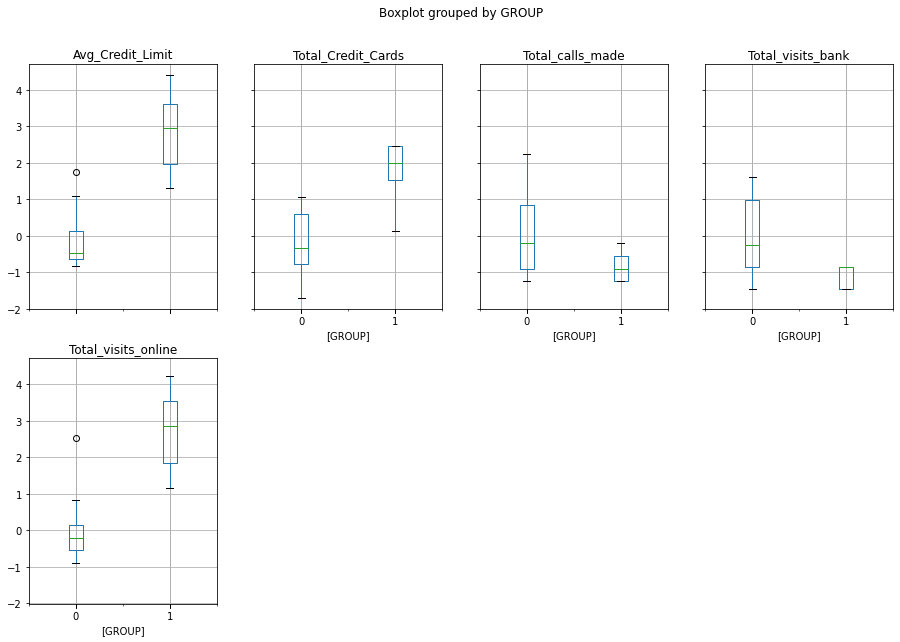

In [741]:
df4.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [742]:
df4.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,1
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593,0
6,1.740187,0.135694,-1.473731,2.861408,-0.553005,1
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271,0
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005,0
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326,0


In [743]:
df_del_cp = df_del.copy()

In [744]:
df5 = df_del_cp.join(df_clusters)

In [745]:
df5.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,0
1,50000,3,0,10,9,0
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1
5,20000,3,0,1,8,0
6,100000,5,0,11,2,1
7,15000,3,0,1,1,0
8,5000,2,0,2,2,0
9,3000,4,0,1,7,0


In [746]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
 5   GROUP                660 non-null    int64
dtypes: int64(6)
memory usage: 31.1 KB


In [747]:
df5.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333,0.075758
std,37625.487804,2.167835,1.631813,2.935724,2.865317,0.264811
min,3000.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000,0.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000,0.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000,0.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000,1.000000


In [748]:
df5[df5['GROUP'] == 0].head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,0
1,50000,3,0,10,9,0
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
5,20000,3,0,1,8,0
7,15000,3,0,1,1,0
8,5000,2,0,2,2,0
9,3000,4,0,1,7,0
10,10000,4,0,5,5,0
11,13000,3,0,2,7,0


In [756]:
df5.groupby(by = 'GROUP').min()  # Getting min values to compare clusters and for analysis

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,3000,1,0,0,0
1,84000,5,0,6,0


In [757]:
df5.groupby(by = 'GROUP').max() # Getting max values to compare clusters and for analysis

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,100000,7,5,10,10
1,200000,10,1,15,3


In [770]:
group_0 = df5[df5['GROUP'] == 0].groupby(by =  'GROUP')    # Also various details about the features for cluster = 0
group_0.describe().T

GROUP                                  0
Avg_Credit_Limit    count     610.000000
                    mean    25847.540984
                    std     20723.721022
                    min      3000.000000
                    25%     10000.000000
                    50%     17000.000000
                    75%     39000.000000
                    max    100000.000000
Total_Credit_Cards  count     610.000000
                    mean        4.375410
                    std         1.873254
                    min         1.000000
                    25%         3.000000
                    50%         4.000000
                    75%         6.000000
                    max         7.000000
Total_visits_bank   count     610.000000
                    mean        2.550820
                    std         1.604041
                    min         0.000000
                    25%         1.000000
                    50%         2.000000
                    75%         4.000000
                    max         5.000000
Total_visits_online count     610.000000
                    mean        1.926230
                    std         1.596219
                    min         0.000000
                    25%         1.000000
                    50%         2.000000
                    75%         3.000000
                    max        10.000000
Total_calls_made    count     610.000000
                    mean        3.788525
                    std         2.874987
                    min         0.000000
                    25%         1.000000
                    50%         3.000000
                    75%         6.000000
                    max        10.000000

In [769]:
group_1 = df5[df5['GROUP'] == 1].groupby(by =  'GROUP')    # Also various details about the features for cluster= 1.
group_1.describe().T

GROUP                                  1
Avg_Credit_Limit    count      50.000000
                    mean   141040.000000
                    std     34457.877272
                    min     84000.000000
                    25%    108750.000000
                    50%    145500.000000
                    75%    170000.000000
                    max    200000.000000
Total_Credit_Cards  count      50.000000
                    mean        8.740000
                    std         1.274715
                    min         5.000000
                    25%         8.000000
                    50%         9.000000
                    75%        10.000000
                    max        10.000000
Total_visits_bank   count      50.000000
                    mean        0.600000
                    std         0.494872
                    min         0.000000
                    25%         0.000000
                    50%         1.000000
                    75%         1.000000
                    max         1.000000
Total_visits_online count      50.000000
                    mean       10.900000
                    std         2.880264
                    min         6.000000
                    25%         8.000000
                    50%        11.000000
                    75%        13.000000
                    max        15.000000
Total_calls_made    count      50.000000
                    mean        1.080000
                    std         0.876915
                    min         0.000000
                    25%         0.000000
                    50%         1.000000
                    75%         2.000000
                    max         3.000000

In [753]:
df5[df5['GROUP'] == 0]['Avg_Credit_Limit'].min()

3000

In [750]:
df5[df5['GROUP'] == 0]['Avg_Credit_Limit'].max()

100000

In [751]:
col = df5.columns[0:5]
col

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [752]:
for g in 0,1:   # tried getting min, mas for all clusters using for loop
    for c in col:
        min = df5[df5['GROUP'] == g][c].min()
        max = df5[df5['GROUP'] == g][c].max()
        print(f'Group and Column , min and max values are : {g,c,min,max}')
#        print(f'Group and Column , min and max values are : {g,c,df5[df5['GROUP'] == g][c].min(),df5[df5['GROUP'] == g][c].max()}')

Group and Column , min and max values are : (0, 'Avg_Credit_Limit', 3000, 100000)
Group and Column , min and max values are : (0, 'Total_Credit_Cards', 1, 7)
Group and Column , min and max values are : (0, 'Total_visits_bank', 0, 5)
Group and Column , min and max values are : (0, 'Total_visits_online', 0, 10)
Group and Column , min and max values are : (0, 'Total_calls_made', 0, 10)
Group and Column , min and max values are : (1, 'Avg_Credit_Limit', 84000, 200000)
Group and Column , min and max values are : (1, 'Total_Credit_Cards', 5, 10)
Group and Column , min and max values are : (1, 'Total_visits_bank', 0, 1)
Group and Column , min and max values are : (1, 'Total_visits_online', 6, 15)
Group and Column , min and max values are : (1, 'Total_calls_made', 0, 3)


#### Let's try KMeans clusterring with three clusters on data without deleting ouliers as above.

In [808]:
df_z_cp = df_z.copy()    # Got a score of 41 with 2 clusters so sticking with three.

In [809]:
# Let us try with K = 3
df3 = df_z_cp.copy()
final_model=KMeans(3)
final_model.fit(df3)
prediction=final_model.predict(df3)

#Append the prediction 
df2["GROUP"] = prediction
df3["GROUP"] = prediction
print("Groups Assigned : \n")
df3.head()

Groups Assigned : 



C:\Users\bapatsub\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,2
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,2
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,2
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,0


In [810]:
df_labels = pd.DataFrame(final_model.labels_, columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')
df_labeled = df_labels.join(df3.iloc[:,0:5])
df_labeled

,labels,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,2,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,0,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...,...
655,0,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,0,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,0,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,0,3.655235,2.443892,-0.860451,4.224968,-1.251537


In [811]:
silhouette_score(df_labeled.drop('labels',axis=1),df_labeled['labels'] )   # We got a score of 50 with three clusters which is
# better than the previous 39.

0.5157182558881063

C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\bapatsub\Anaconda3\lib\site-packages\pandas\plo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E82CD35808>,
      dtype=object)

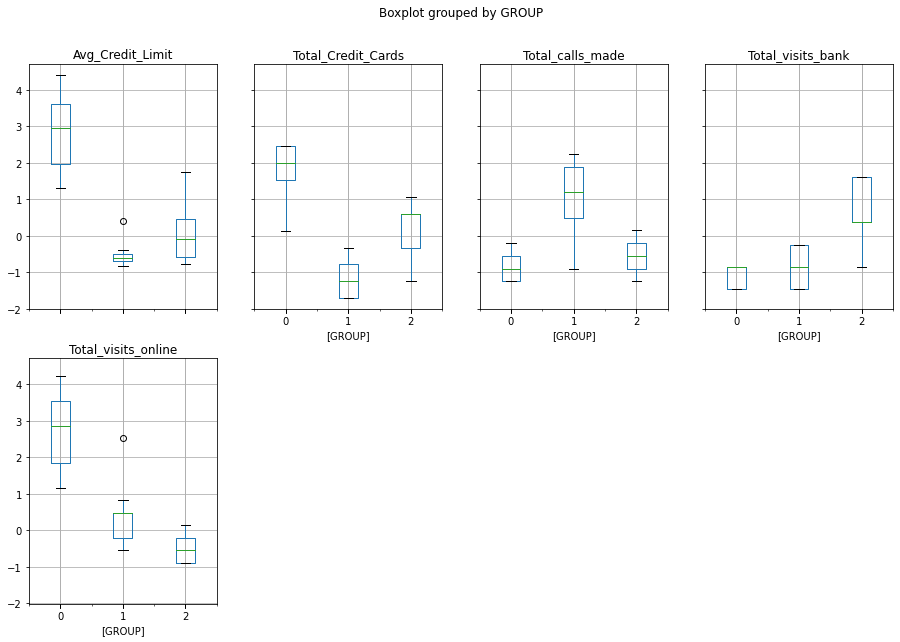

In [812]:
df3.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [813]:
df_join = df_labels.join(df_del)

In [814]:
for g in 0,1,2:    # Used for loop to get min max values for all clusters.
    for c in col:
        min = df_join[df_join['labels'] == g][c].min()
        max = df_join[df_join['labels'] == g][c].max()
        print(f'Group and Column , min and max values are : {g,c,min,max}')

Group and Column , min and max values are : (0, 'Avg_Credit_Limit', 84000, 200000)
Group and Column , min and max values are : (0, 'Total_Credit_Cards', 5, 10)
Group and Column , min and max values are : (0, 'Total_visits_bank', 0, 1)
Group and Column , min and max values are : (0, 'Total_visits_online', 6, 15)
Group and Column , min and max values are : (0, 'Total_calls_made', 0, 3)
Group and Column , min and max values are : (1, 'Avg_Credit_Limit', 3000, 50000)
Group and Column , min and max values are : (1, 'Total_Credit_Cards', 1, 4)
Group and Column , min and max values are : (1, 'Total_visits_bank', 0, 2)
Group and Column , min and max values are : (1, 'Total_visits_online', 1, 10)
Group and Column , min and max values are : (1, 'Total_calls_made', 1, 10)
Group and Column , min and max values are : (2, 'Avg_Credit_Limit', 5000, 100000)
Group and Column , min and max values are : (2, 'Total_Credit_Cards', 2, 7)
Group and Column , min and max values are : (2, 'Total_visits_bank', 1

In [815]:
df_join.groupby(by = 'labels').min()  # Getting min value for all clusters

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,84000,5,0,6,0
1,3000,1,0,1,1
2,5000,2,1,0,0


In [816]:
df_join.groupby(by = 'labels').max()  # Getting max values for all clusters.

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,200000,10,1,15,3
1,50000,4,2,10,10
2,100000,7,5,3,4


In [817]:
df_join.info()   # There is a category column so the describe on the dataframe is giving some values as NAN 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   labels               660 non-null    category
 1   Avg_Credit_Limit     660 non-null    int64   
 2   Total_Credit_Cards   660 non-null    int64   
 3   Total_visits_bank    660 non-null    int64   
 4   Total_visits_online  660 non-null    int64   
 5   Total_calls_made     660 non-null    int64   
dtypes: category(1), int64(5)
memory usage: 26.7 KB


In [818]:
df_join1 = df_join.copy()  # Converting the category column to integer so that describe on dataframe works fine.
cat_columns = df_join1.select_dtypes(['category']).columns
cat_columns
df_join1[cat_columns] = df_join1[cat_columns].apply(lambda x: x.cat.codes)

In [819]:
df_join1.info()  # Converted the labels column from type category to integer.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   labels               660 non-null    int8 
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(5), int8(1)
memory usage: 26.6 KB


In [821]:
df_join1.describe()

,labels,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,1.509091,34574.242424,4.706061,2.403030,2.606061,3.583333
std,0.634068,37625.487804,2.167835,1.631813,2.935724,2.865317
min,0.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,2.000000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,2.000000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,2.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [822]:
df_join1.head(10)

,labels,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2,100000,2,1,1,0
1,1,50000,3,0,10,9
2,2,50000,7,1,3,4
3,2,30000,5,1,1,4
4,0,100000,6,0,12,3
5,1,20000,3,0,1,8
6,0,100000,5,0,11,2
7,1,15000,3,0,1,1
8,1,5000,2,0,2,2
9,1,3000,4,0,1,7


In [823]:
df_join1.isna().sum()

labels                 0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [824]:
df_join1[df_join1['labels'] == 0]

,labels,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,0,100000,6,0,12,3
6,0,100000,5,0,11,2
612,0,157000,9,1,14,1
613,0,94000,9,1,11,0
614,0,163000,8,1,7,1
615,0,131000,9,1,10,1
616,0,96000,10,1,11,2
617,0,136000,8,0,13,0
618,0,121000,7,0,13,2
619,0,158000,7,0,13,0


In [825]:
df_join1[df_join1['labels'] == 1]

,labels,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
1,1,50000,3,0,10,9
5,1,20000,3,0,1,8
7,1,15000,3,0,1,1
8,1,5000,2,0,2,2
9,1,3000,4,0,1,7
...,...,...,...,...,...,...
224,1,12000,4,1,5,9
225,1,16000,4,1,2,5
226,1,8000,1,2,4,8
227,1,8000,2,2,3,8


In [826]:
df_join1.describe()

,labels,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,1.509091,34574.242424,4.706061,2.403030,2.606061,3.583333
std,0.634068,37625.487804,2.167835,1.631813,2.935724,2.865317
min,0.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,2.000000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,2.000000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,2.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [830]:
kgroup_0 = df_join1[df_join1['labels'] == 0].groupby(by =  'labels')
kgroup_0.describe().T     # Also various details about the features for cluster = 0

labels                                 0
Avg_Credit_Limit    count      50.000000
                    mean   141040.000000
                    std     34457.877272
                    min     84000.000000
                    25%    108750.000000
                    50%    145500.000000
                    75%    170000.000000
                    max    200000.000000
Total_Credit_Cards  count      50.000000
                    mean        8.740000
                    std         1.274715
                    min         5.000000
                    25%         8.000000
                    50%         9.000000
                    75%        10.000000
                    max        10.000000
Total_visits_bank   count      50.000000
                    mean        0.600000
                    std         0.494872
                    min         0.000000
                    25%         0.000000
                    50%         1.000000
                    75%         1.000000
                    max         1.000000
Total_visits_online count      50.000000
                    mean       10.900000
                    std         2.880264
                    min         6.000000
                    25%         8.000000
                    50%        11.000000
                    75%        13.000000
                    max        15.000000
Total_calls_made    count      50.000000
                    mean        1.080000
                    std         0.876915
                    min         0.000000
                    25%         0.000000
                    50%         1.000000
                    75%         2.000000
                    max         3.000000

In [828]:
kgroup_1 = df_join1[df_join1['labels'] == 1].groupby(by =  'labels')
kgroup_1.describe().T               # Also various details about the features for cluster = 1

labels                                1
Avg_Credit_Limit    count    224.000000
                    mean   12174.107143
                    std     5249.048524
                    min     3000.000000
                    25%     8000.000000
                    50%    12000.000000
                    75%    16000.000000
                    max    50000.000000
Total_Credit_Cards  count    224.000000
                    mean       2.410714
                    std        1.100783
                    min        1.000000
                    25%        1.000000
                    50%        2.000000
                    75%        3.000000
                    max        4.000000
Total_visits_bank   count    224.000000
                    mean       0.933036
                    std        0.803567
                    min        0.000000
                    25%        0.000000
                    50%        1.000000
                    75%        2.000000
                    max        2.000000
Total_visits_online count    224.000000
                    mean       3.553571
                    std        1.218978
                    min        1.000000
                    25%        2.000000
                    50%        4.000000
                    75%        4.000000
                    max       10.000000
Total_calls_made    count    224.000000
                    mean       6.870536
                    std        1.990161
                    min        1.000000
                    25%        5.000000
                    50%        7.000000
                    75%        9.000000
                    max       10.000000

In [831]:
kgroup_2 = df_join1[df_join1['labels'] == 2].groupby(by =  'labels')
kgroup_2.describe().T                  # Also various details about the features for cluster = 2

labels                                 2
Avg_Credit_Limit    count     386.000000
                    mean    33782.383420
                    std     22169.460696
                    min      5000.000000
                    25%     13000.000000
                    50%     31000.000000
                    75%     52000.000000
                    max    100000.000000
Total_Credit_Cards  count     386.000000
                    mean        5.515544
                    std         1.140069
                    min         2.000000
                    25%         4.000000
                    50%         6.000000
                    75%         6.000000
                    max         7.000000
Total_visits_bank   count     386.000000
                    mean        3.489637
                    std         1.135563
                    min         1.000000
                    25%         3.000000
                    50%         3.000000
                    75%         5.000000
                    max         5.000000
Total_visits_online count     386.000000
                    mean        0.981865
                    std         0.857167
                    min         0.000000
                    25%         0.000000
                    50%         1.000000
                    75%         2.000000
                    max         3.000000
Total_calls_made    count     386.000000
                    mean        2.000000
                    std         1.430648
                    min         0.000000
                    25%         1.000000
                    50%         2.000000
                    75%         3.000000
                    max         4.000000